In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Trainingsdatensatz laden

In [32]:
train_data = pd.read_csv("/Users/schoch/Documents/0_Vorlesungen/DataScienceFundamentals/IntroductionToDataScience/2023_Git_WWI23B4/TitanicExample/titanic/train.csv")
test_data = pd.read_csv("/Users/schoch/Documents/0_Vorlesungen/DataScienceFundamentals/IntroductionToDataScience/2023_Git_WWI23B4/TitanicExample/titanic/test.csv")

## Einen ersten Blick in die Daten
* Jede Zeile entspricht einem Passagier
* Wir bekommen einen ersten Überblick über die Datenstruktur
* Die Spalte Cabin enthält fehlende Werte NaN (Not a Number)

### Output Variable
Survived: 0 = Dead, 1 = Survived --> Output Variable

### Input Variablen (mögliche)
Pclass: Ticket class with 1 = 1st class, 2 = 2nd class, 3 = 3rd class

Sex: Gender of male or female

Age: Age in years

SibSp: Number of siblings/spouses aboard the Titanic

Parch: Number of parents/children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare (Preis)

Cabin: Cabin number

Embarked: Port of Embarkation with C = Cherbourg, Q = Queenstown, S = Southampton

In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Einen Überblick verschaffen
Die Spalte Age enthält einige fehlende Werte

Cabin enthält sehr viele fehlende Werte, daher wäre es sinnvoll auf diese Spalte zu verzichten. Ohne Info über den Ort der Cabin im Schiff ist nicht zu erwarten dass das Merkmal einen großen Einfluss auf die Überlebensrate hat

In [38]:
# Anzahl von Zeilen und Spalten
train_data.shape

(891, 12)

In [39]:
test_data.shape

(418, 11)

In [40]:
# Anzahl der fehlenden Werte
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: >

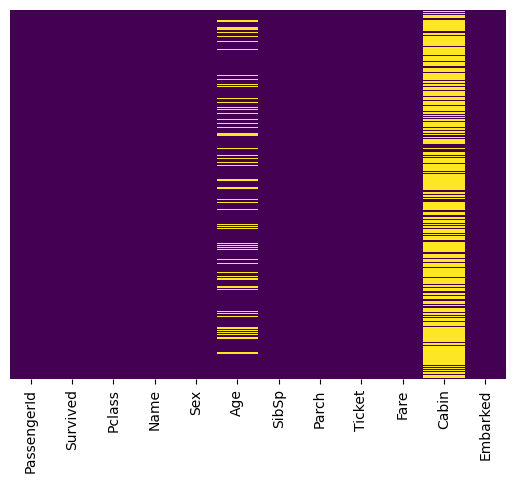

In [41]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
# Welche Einträge sind vorhanden (unique values)
np.unique(train_data['Sex'])

array(['female', 'male'], dtype=object)

In [11]:
# Maximales Alter der Passagiere, die Spalte Age wird hier mit .Age gewählt
np.max(train_data.Age)

80.0

## Zusammenfassung mit Hilfer der Funktion info()
* Anzahl der Zeilen (891)
* Übersicht über die Spalten (12 columns)
* Anzahl der Non-Null und Datentyp: 

Age und Cabin enthält fehlende Werte

Name, Sex, Ticket, Cabin und Embarked sind qualitative Input-Variablen
* Speichernutzung

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Übersicht über Wertebereich der Daten: describe() 
Nur numerische Spalten werden analysiert

* PassengerID ist eine forlaufende ID, hier macht es wenig Sinn den Mittelwert zu berechnen
* Im Mittel haben 38% der Passagiere überlebt
* Es gibt wohl nur die Klassen 1-3 und die Integer-Variable ist eigentlich ordinalskaliert, daher ist es nicht sinnvoll arithmetische Operationen auszuführen
* Das Alter liegt zwischen 0.42 und 80 Jahren, im Mittel waren die Passagiere 29.7 Jahre alt
* SibSp: Anzahl der Ehegatten/Geschwistern liegt zwischen 0 und 8
* Parch: Anzahl der Kinder/Eltern liegt zwischen 0 und 6
* Der Preis für die Tickets liegt zwischen 0 und 512 (Einheit ist nicht angegeben)


In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Wie viele Kinder waren an Board und wie war die Überlebensrate?
Leider enthält die Age Spalte viele fehlende Werte

In [43]:
kids = len(train_data[train_data.Age<18])

print('Es waren', kids, 'Kinder an Board')
print('Das entspricht', kids/len(train_data)*100, '% der Gesamtpassagieranzahl')

kids_suvived = len(train_data[(train_data.Age<18) & (train_data.Survived==1.0)])
print('Es haben ', kids_suvived/kids*100, '% der Kinder überlebt')

print('Von ', sum(train_data['Age'].isnull()), 'Passagieren fehlt die Altersangabe')

Es waren 113 Kinder an Board
Das entspricht 12.682379349046016 % der Gesamtpassagieranzahl
Es haben  53.98230088495575 % der Kinder überlebt
Von  177 Passagieren fehlt die Altersangabe


## Wie viele der Passagiere ohne Altersangabe haben überlebt

In [44]:
print(sum((train_data[train_data['Age'].isnull()].Survived)), 'Passagieren ohne Altersangabe haben überlebt')
print(sum(1-(train_data[train_data['Age'].isnull()].Survived)), 'Passagieren ohne Altersangabe haben nicht überlebt')

52 Passagieren ohne Altersangabe haben überlebt
125 Passagieren ohne Altersangabe haben nicht überlebt


## Age enthält viele fehlende Werte
Daher zunächst Löschen der Zeilen mit fehlenden Werten unter der Annahme dass das fehlen des Alters keinen Einfluss auf die Überlebensrate hat
Es sind nun noch 712 Zeilen im Datensatz enthalten

Spalte Cabin droppen, da viele fehlende Werte


In [52]:
# Trainingsdaten
train_data_clean = train_data.drop(columns=['Cabin'])
train_data_clean = train_data_clean.dropna()
#Testdaten
test_data_clean = test_data.drop(columns=['Cabin'])
test_data_clean = test_data_clean.dropna()

In [46]:
# Analyse über alle Spalten
train_data_clean.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,712.000000,712.000000,712.000000,712,712,712.000000,712.000000,712.000000,712,712.000000,712
unique,NaN,NaN,NaN,712,2,NaN,NaN,NaN,541,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,554
mean,448.589888,0.404494,2.240169,NaN,NaN,29.642093,0.514045,0.432584,NaN,34.567251,NaN
std,258.683191,0.491139,0.836854,NaN,NaN,14.492933,0.930692,0.854181,NaN,52.938648,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,222.750000,0.000000,1.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,8.050000,NaN
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.645850,NaN
75%,677.250000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.000000,NaN


In [47]:
women = train_data_clean[train_data_clean.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_data_clean[train_data_clean.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.752895752895753
% of men who survived: 0.2052980132450331


In [48]:
train_data_numeric = train_data_clean.select_dtypes(include=['number'])
train_data_numeric.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


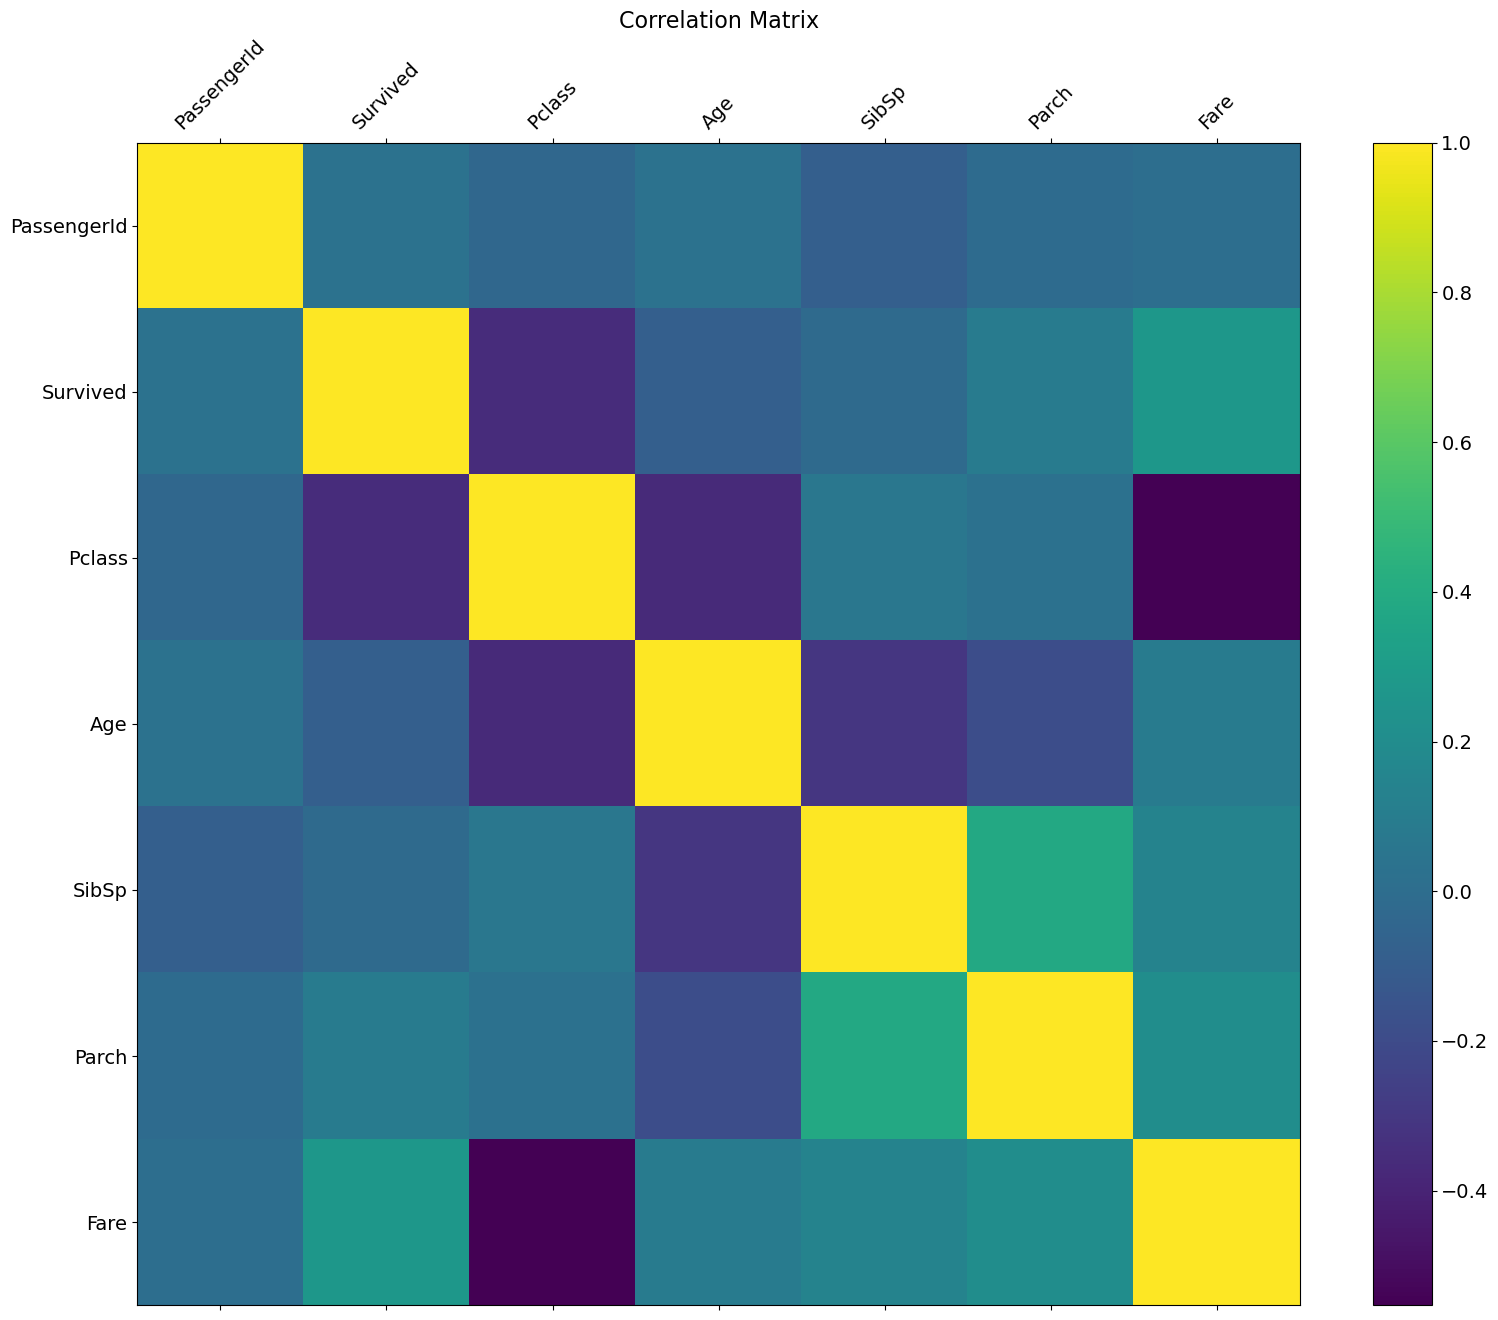

In [49]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train_data_numeric.corr(), fignum=f.number)
plt.xticks(range(train_data_numeric.select_dtypes(['number']).shape[1]), train_data_clean.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train_data_numeric.select_dtypes(['number']).shape[1]), train_data_clean.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Decision Tree

In [50]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [78]:
test_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Name         331 non-null    object 
 3   Age          331 non-null    float64
 4   SibSp        331 non-null    int64  
 5   Parch        331 non-null    int64  
 6   Ticket       331 non-null    object 
 7   Fare         331 non-null    float64
 8   Sex_female   331 non-null    bool   
 9   Sex_male     331 non-null    bool   
 10  Embarked_C   331 non-null    bool   
 11  Embarked_Q   331 non-null    bool   
 12  Embarked_S   331 non-null    bool   
dtypes: bool(5), float64(2), int64(4), object(2)
memory usage: 24.9+ KB


In [79]:
# Umwandlung Kategorischer Variablen in Binäre: One-Hot-Encoding
# get_dummies erstellt eine neue Spalte für jede Kategorie der Variablen, in jeder Zeile wird mit true oder false vermerkt ob die Kategorie vorhanden ist
# Für binäre Variablen (hier Sex) reicht eine Dummy-Variable aus
train_data_clean = pd.get_dummies(train_data_clean, columns=['Sex', 'Embarked'])
test_data_clean = pd.get_dummies(test_data_clean, columns=['Sex', 'Embarked'])

KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [55]:
train_data_clean.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [56]:
test_data_clean.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,True,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,False,True,False,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,False,True,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,True,False,False,False,True


In [70]:
# train_data: Trainingsdaten, test_data: Testdaten
# Ohne Variable 'Name', 'Ticket'

# Splitting the data into train and test sets
X = train_data_clean.drop(columns=['Survived', 'Name', 'Ticket', 'Sex_female'])
y = train_data_clean.Survived
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)


# 'Testdaten' aus 2. csv Daten enthalten keine Infos zu Survived, der Output Variablen
X_validation = test_data_clean.drop(columns=['Name', 'Ticket', 'Sex_female'])

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.7242990654205608


[Text(0.39245248538011696, 0.9772727272727273, 'x[6] <= 0.5\ngini = 0.481\nsamples = 498\nvalue = [298, 200]'),
 Text(0.20175438596491227, 0.9318181818181818, 'x[1] <= 2.5\ngini = 0.358\nsamples = 171\nvalue = [40, 131]'),
 Text(0.07017543859649122, 0.8863636363636364, 'x[2] <= 2.5\ngini = 0.106\nsamples = 107\nvalue = [6, 101]'),
 Text(0.03508771929824561, 0.8409090909090909, 'x[5] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.023391812865497075, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04678362573099415, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10526315789473684, 0.8409090909090909, 'x[0] <= 206.0\ngini = 0.091\nsamples = 105\nvalue = [5, 100]'),
 Text(0.07017543859649122, 0.7954545454545454, 'x[0] <= 198.0\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.05847953216374269, 0.75, 'x[0] <= 170.0\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(0.03508771929824561, 0.7045454545454546, 'x[2] <= 28.

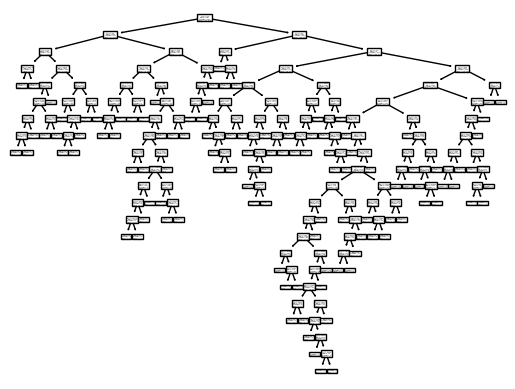

In [71]:
# Plot tree
tree.plot_tree(dt)

In [72]:
# Hyperparameter Tuning of DTC

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [73]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

In [74]:
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confusion Matrix - Train: 
 [[287  11]
 [ 87 113]]

 Confusion Matrix - Test: 
 [[123   3]
 [ 40  48]]


In [75]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       126
           1       0.94      0.55      0.69        88

    accuracy                           0.80       214
   macro avg       0.85      0.76      0.77       214
weighted avg       0.83      0.80      0.79       214



In [76]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.8032128514056225
Accuracy of Decision Tree-Test:  0.7990654205607477


[Text(0.5, 0.8333333333333334, 'x[6] <= 0.5\ngini = 0.481\nsamples = 498\nvalue = [298, 200]'),
 Text(0.25, 0.5, 'x[1] <= 2.5\ngini = 0.358\nsamples = 171\nvalue = [40, 131]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.106\nsamples = 107\nvalue = [6, 101]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 64\nvalue = [34, 30]'),
 Text(0.75, 0.5, 'x[2] <= 3.5\ngini = 0.333\nsamples = 327\nvalue = [258, 69]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.415\nsamples = 17\nvalue = [5, 12]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.3\nsamples = 310\nvalue = [253, 57]')]

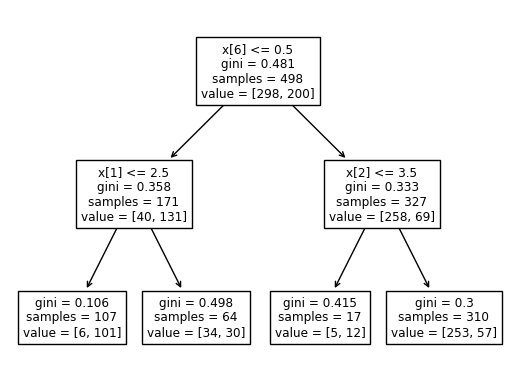

In [77]:
# Plot tree
tree.plot_tree(dt)